In [1]:
#Creating a HOME variable which allows us to easily manage paths (datasets, etc)
import os
HOME = os.getcwd()
print(HOME)


c:\Users\neil9\Desktop\PROTOTYPETOUPLOAD\DriverDrowsinessDetectionSystem\Prototype


In [3]:
#Imports

#Ultralytics must be installed with this version
%pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5600X 6-Core Processor)
Setup complete  (12 CPUs, 15.9 GB RAM, 870.3/953.2 GB disk)


## Obtaining the custom built dataset from Roboflow

In [ ]:

#%pip install --user roboflow --quiet

#New one:
from roboflow import Roboflow

rf = Roboflow(api_key="gVb0OQxdazhtThIlTabi")
project = rf.workspace("mcast-lakao").project("driverdrowsiness1")
version = project.version(7)
dataset = version.download("yolov8")


c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DriverDrowsiness1-7 in yolov8:: 100%|██████████| 7532/7532 [00:03<00:00, 1917.40it/s]


## Custom Training
### Performing model training on the custom dataset
Framework : YOLOv8 object detection framework <br/>
As a starting point for the model training, a pretrained YOLOv8 model is being used (yolov8s.pt - which is a PyTorch model file) <br/>
The 'data.yaml' file in the 'data' parameter contains general dataset information including certain paths and classes definitions

In [ ]:

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1


New https://pypi.org/project/ultralytics/8.2.15 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5600X 6-Core Processor)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\DriverDrowsiness1-7/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buf

Outputting the confusion matrix

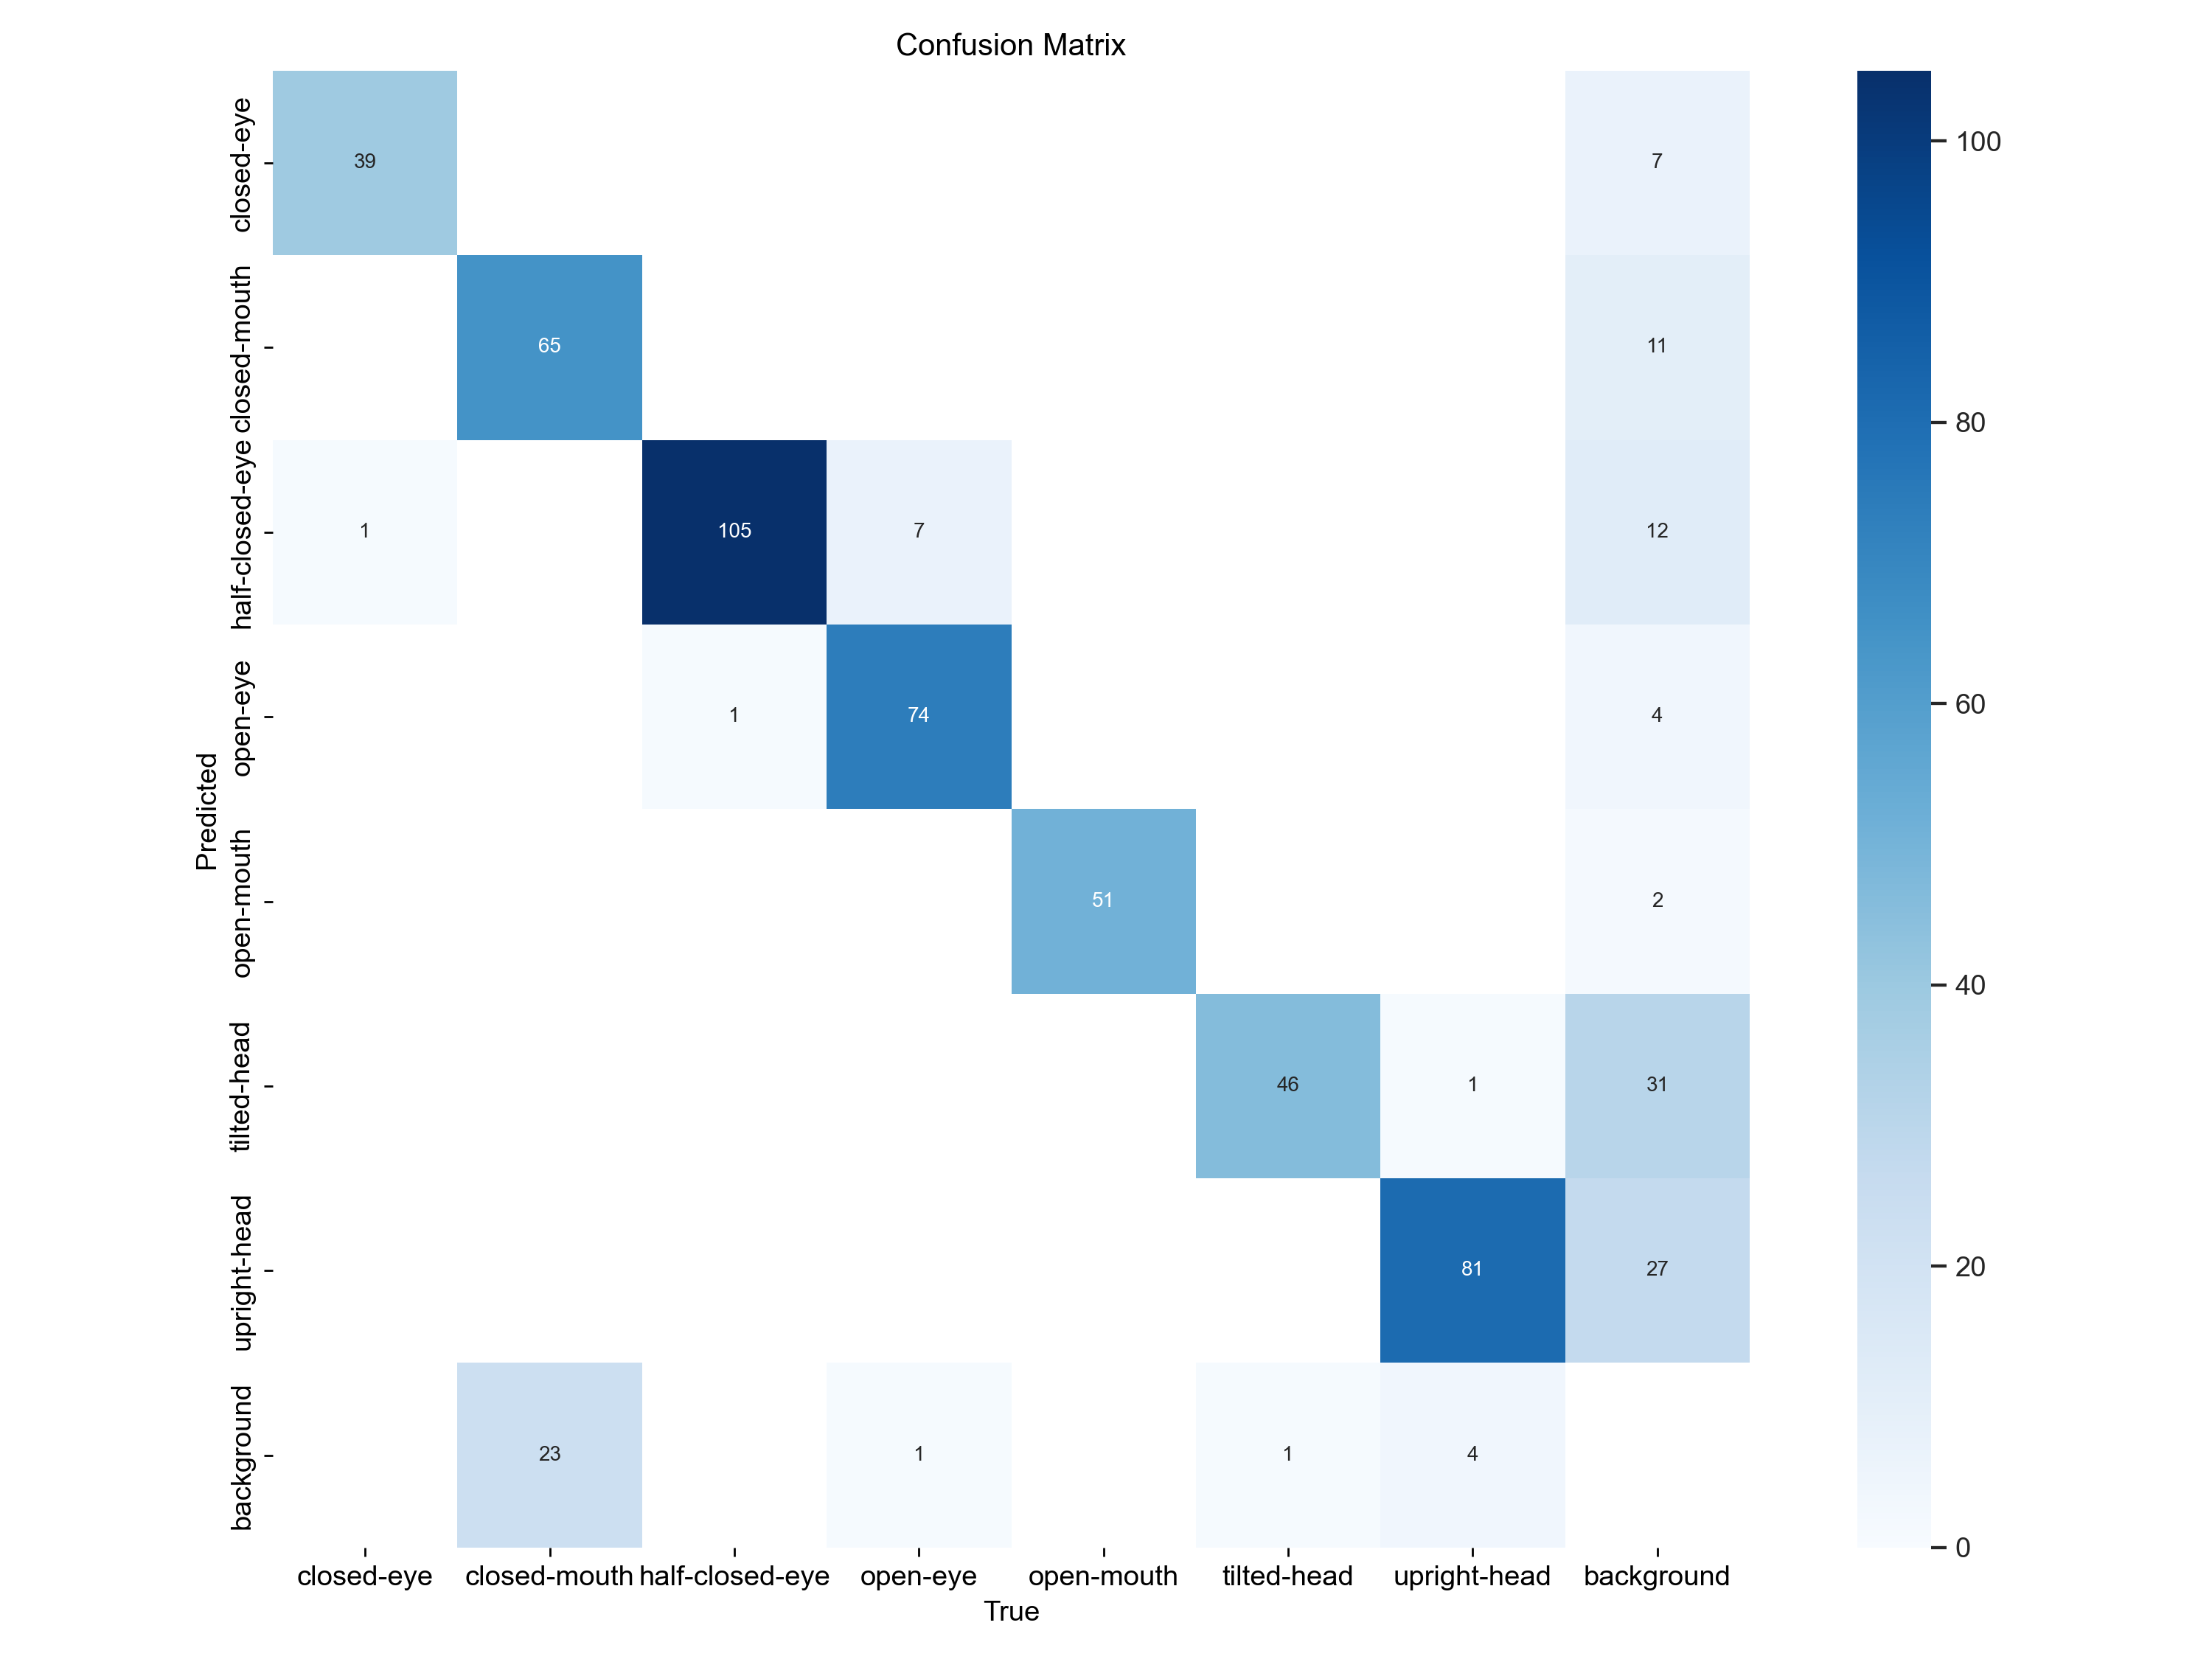

In [4]:

Image(filename=f'{HOME}/runs/detect/train5_10/confusion_matrix.png', width=600)

Outputting the graphs generated when training

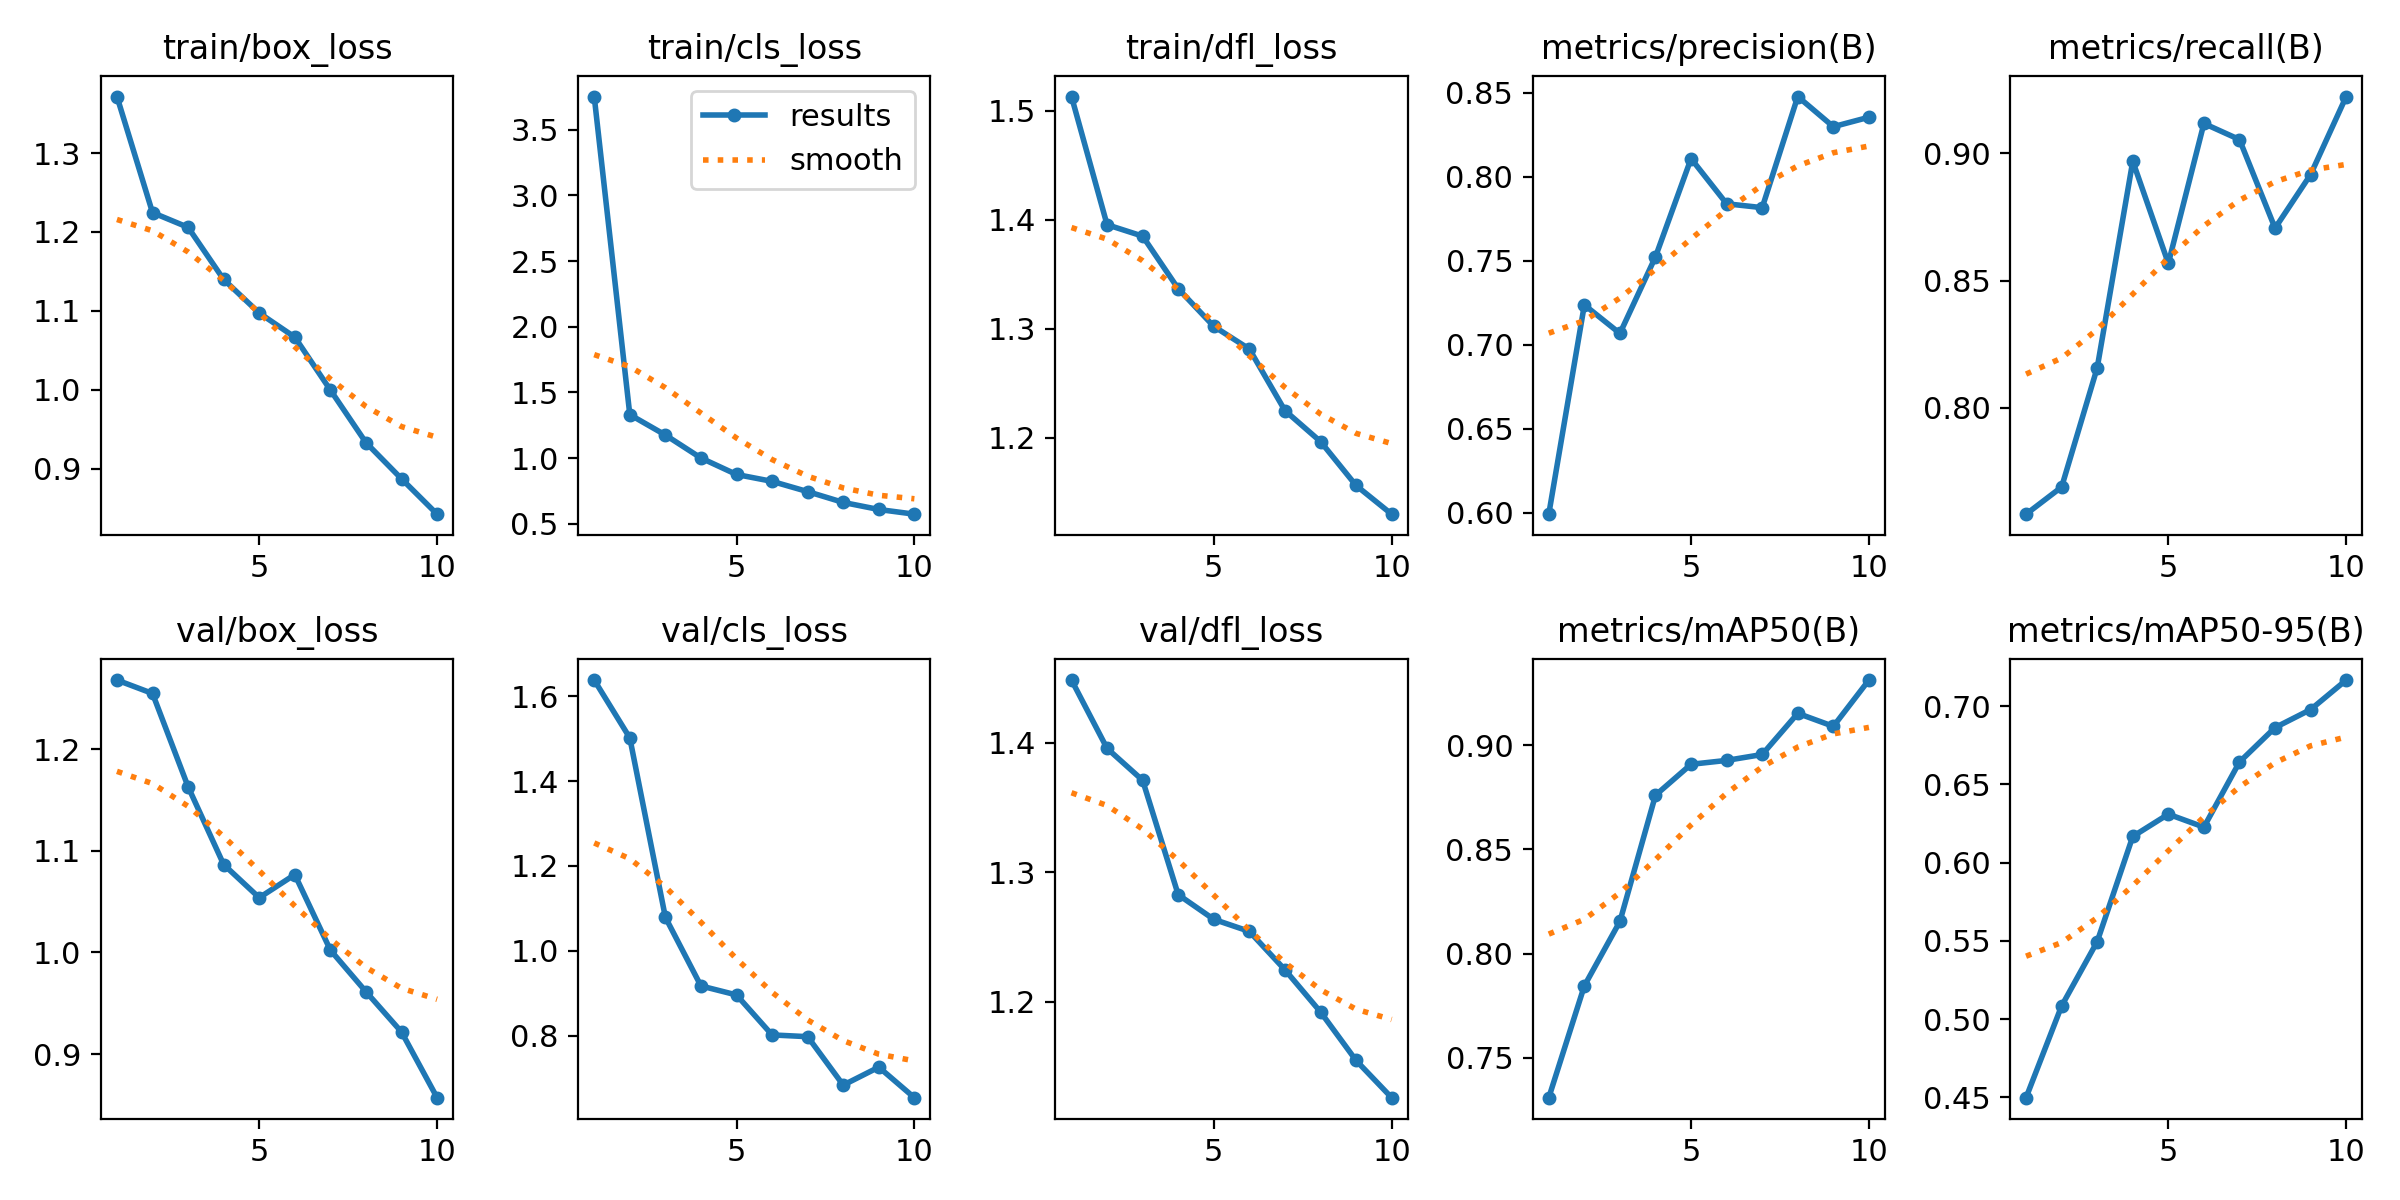

In [5]:

Image(filename=f'{HOME}/runs/detect/train5_10/results.png', width=600)

Outputting a batch which was predicted

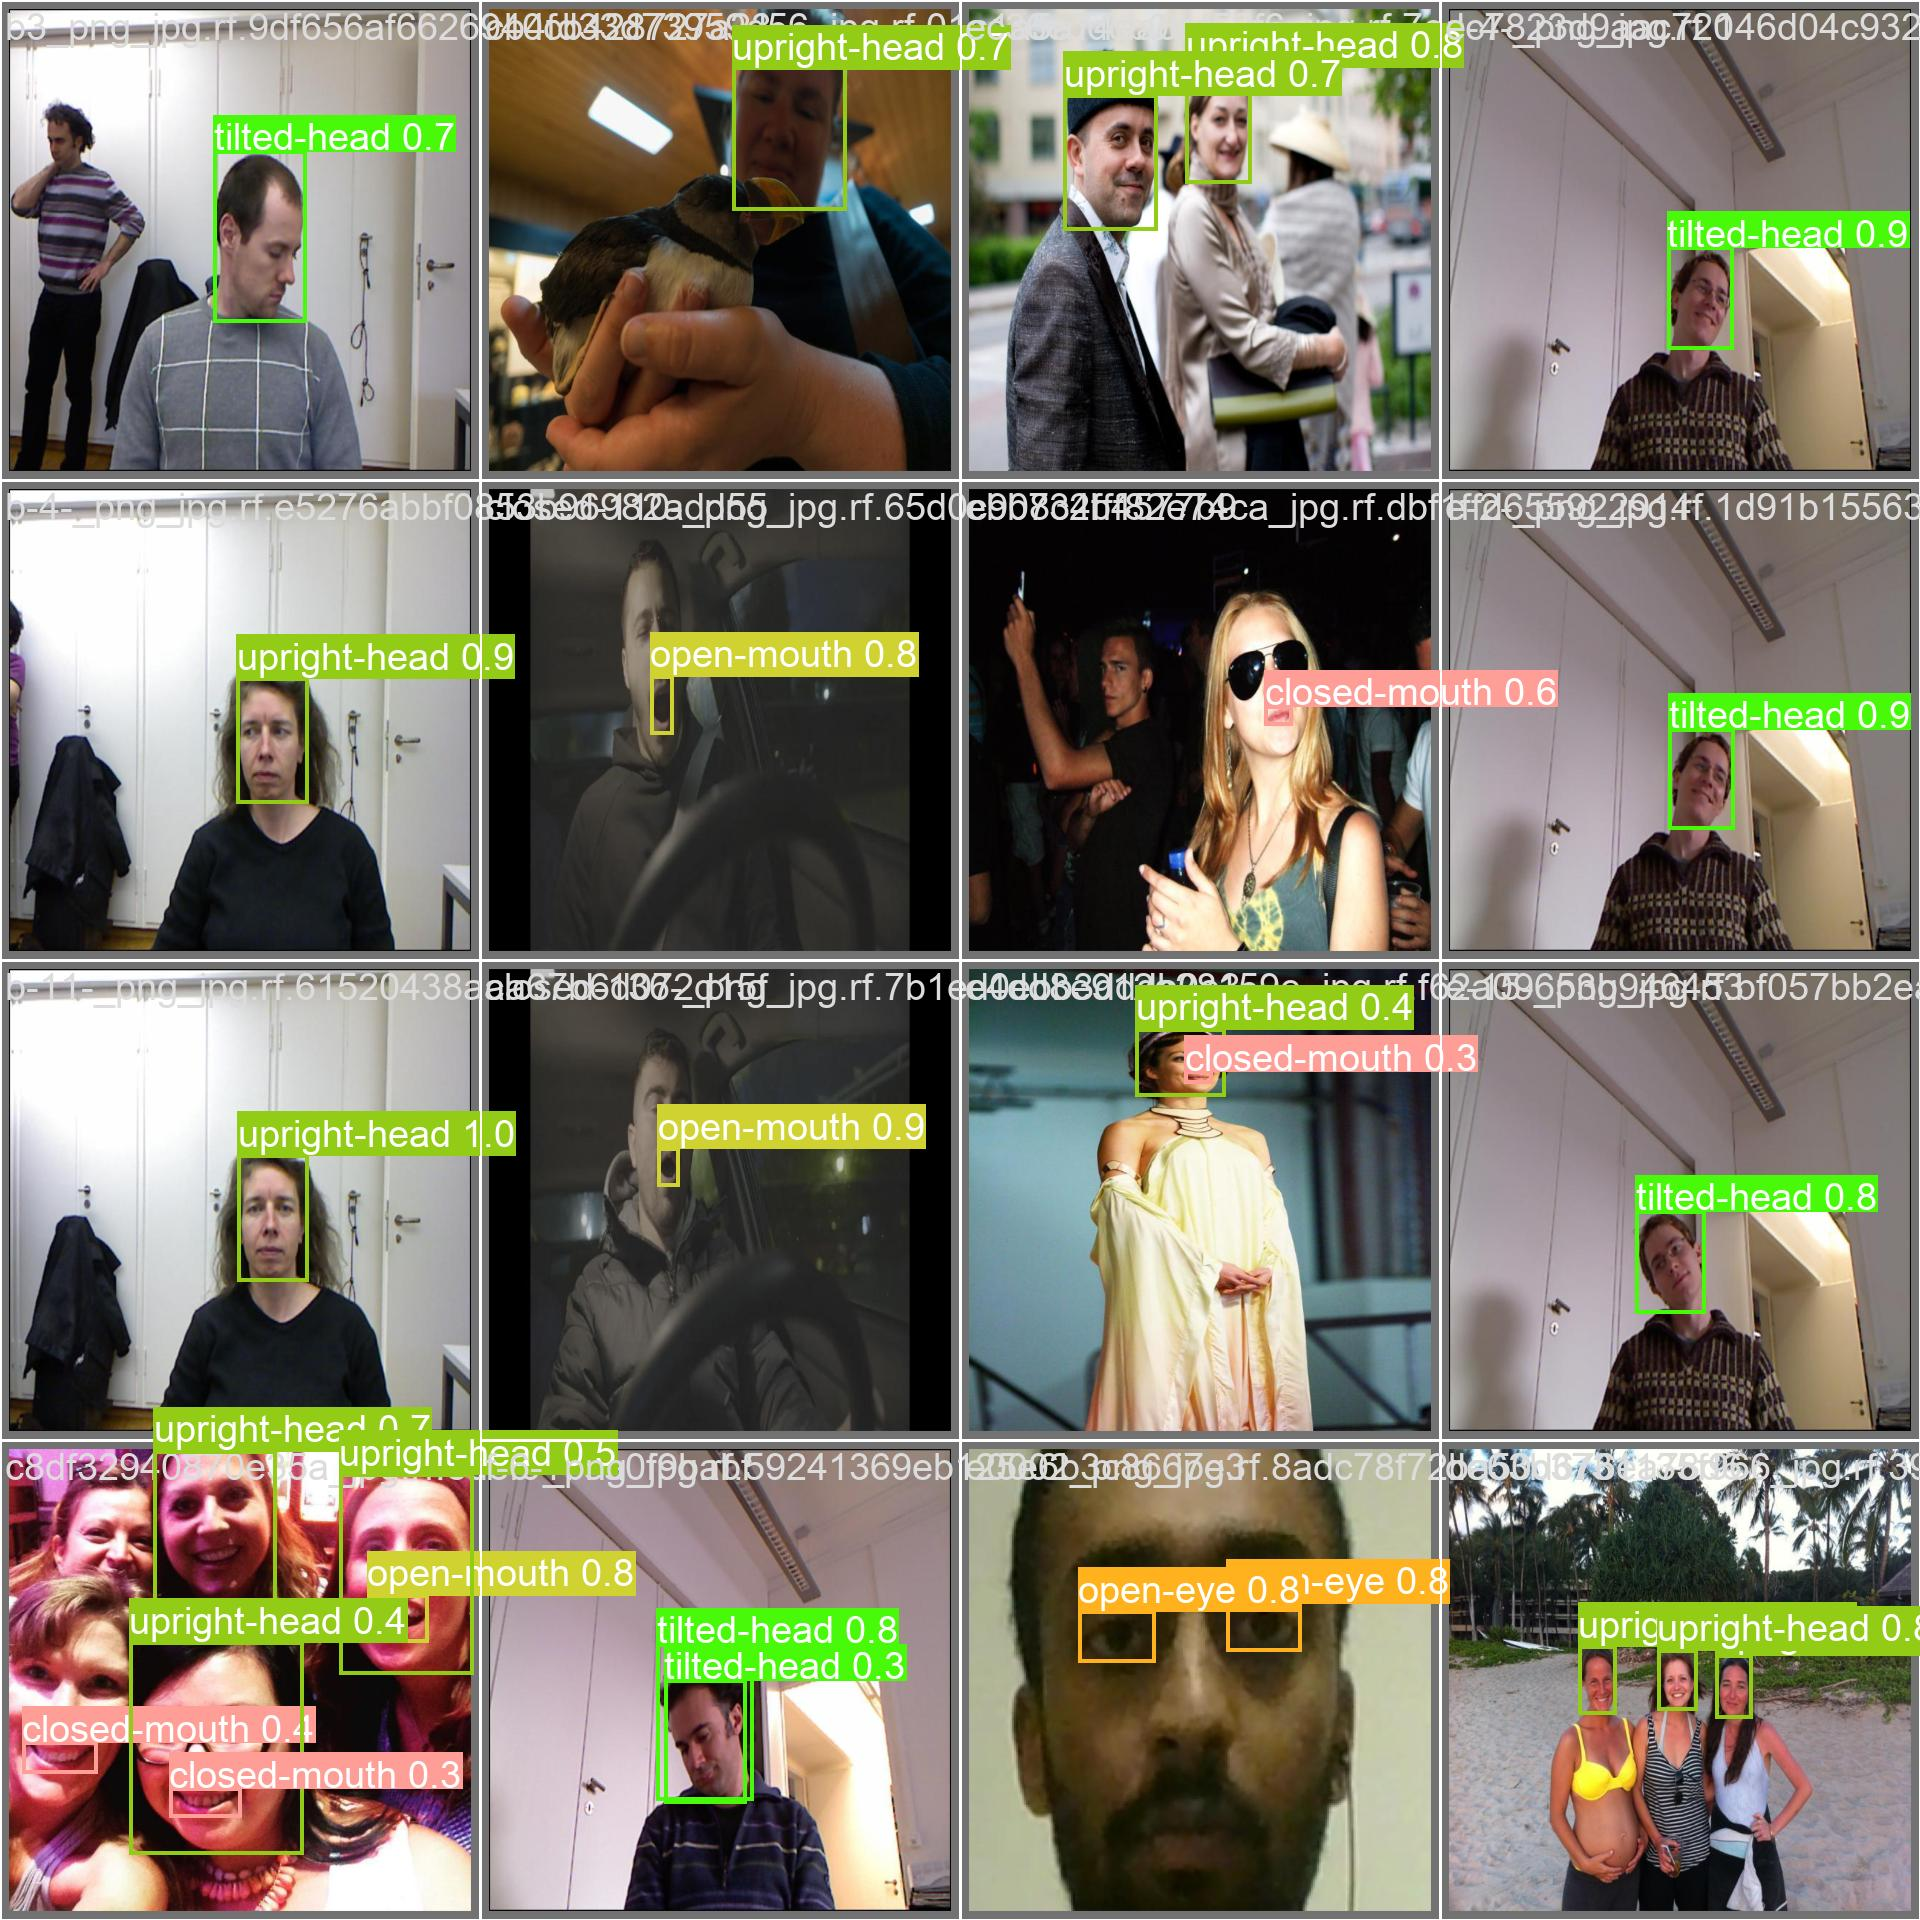

In [6]:

Image(filename=f'{HOME}/runs/detect/train5_10/val_batch2_pred.jpg', width=600)

## Validating the custom model
Here, we are using "mode=val", the 'valid' section of the dataset is being used (which have not been used yet) to validate the custom model which was built. <br/>
The weights folder includes files which represent the parameters which the program learned the the model uses for predicting. Common formats: .pt (PyTortch), .tf (TensorFlow) <br/>
   best.pt - represents best performing weights while training <br/>
   last.pt - represents the weights of the last epoch which was trained

In [10]:
datasetLocation = f'{HOME}/DriverDrowsiness1-7'
!yolo task=detect mode=val model={HOME}/runs/detect/train5_10/weights/best.pt data={datasetLocation}/data.yaml

Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5600X 6-Core Processor)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

val: Scanning C:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\DriverDrowsiness1-7\valid\labels.cache... 376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 376/376 [00:00<?, ?it/s]
val: Scanning C:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\DriverDrowsiness1-7\valid\labels.cache... 376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 376/376 [00:00<?, ?it/s]
WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 500. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/24 [00:00<?, ?it/s]
                 Class     Images  Instances   

## Inference with Custom Model
Here, we will use the trained model to make predictions on new and unseen images and video.

### Running inference on images

In [11]:

datasetLocation = f'{HOME}/DriverDrowsiness1-7'
!yolo task=detect mode=predict model={HOME}/runs/detect/train5_10/weights/best.pt conf=0.25 source={datasetLocation}/test/images save=True


Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5600X 6-Core Processor)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/752 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\DriverDrowsiness1-7\test\images\000091_jpg.rf.8e8f3dd308cb1f46b8d6c669f6afe519.jpg: 800x800 1 closed-mouth, 1 upright-head, 248.7ms
image 2/752 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\DriverDrowsiness1-7\test\images\000279_jpg.rf.210872dd46bafb68a29e869d36d9176f.jpg: 800x800 1 closed-mouth, 224.7ms
image 3/752 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\DriverDrowsiness1-7\test\images\000401_jpg.rf.fb032561666d5f4573b0638a08490ce0.jpg: 800x800 1 closed-mouth, 238.2ms
image 4/752 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\DriverDrowsiness1-7\test\images\000468_jpg.rf.eb20b36f38a84c9fc981c42331925c70.jpg: 800x800 1 closed-mouth, 220.6ms
image 5/752 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\DriverDrowsiness1-7\t

Outputting the results

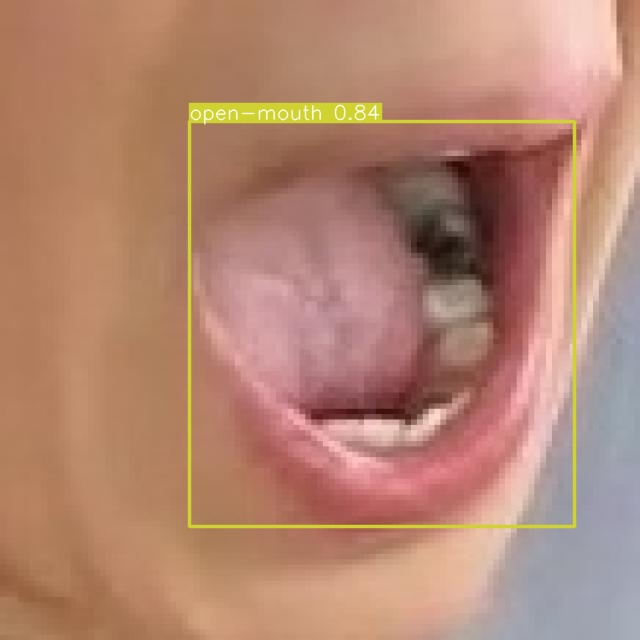

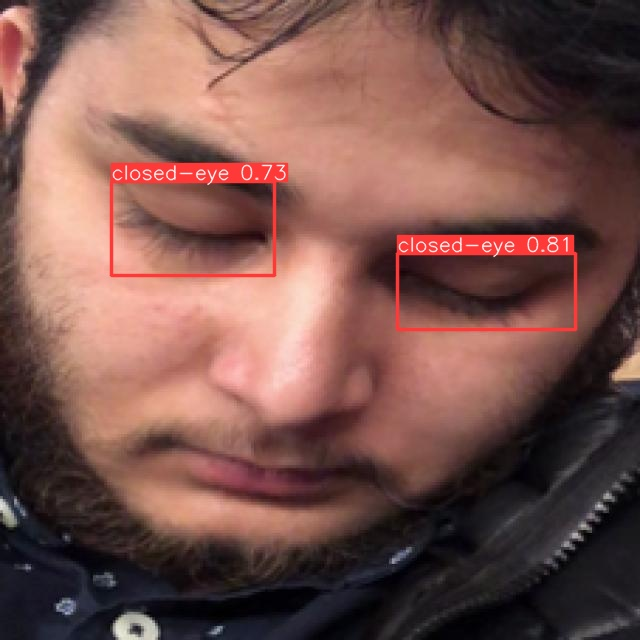

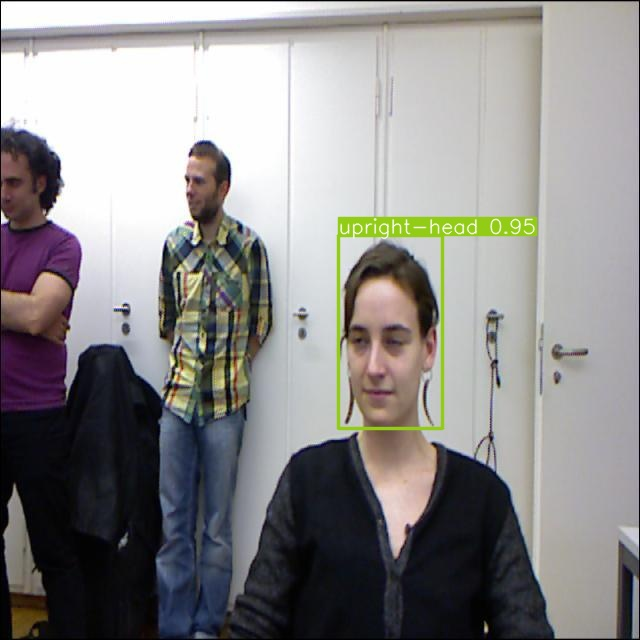

In [13]:
import glob
import random
from IPython.display import Image, display

#Getting the path of all the images foun in the predict folder which was created previously
#Here, 'glob' is being used so that it finds ALL the files ending with '.jpg', hence why '*.jpg". Glob is used to find files while matching a certain pattern.
imagePaths = glob.glob(f'{HOME}/runs/detect/predict29/*.jpg')

#Randomizing the images so that later 3 random images are outputted, and not always the same ones
random.shuffle(imagePaths)

#Outputting 3 random predicted images
for imagePath in imagePaths[:3]:
      display(Image(filename=imagePath, width=600))
      print("\n")

### Running inference on images found on Google


In [14]:

!yolo task=detect mode=predict model={HOME}/runs/detect/train5_10/weights/best.pt conf=0.1 source={HOME}/imagesInferenceTest save=True

Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5600X 6-Core Processor)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/6 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\imagesInferenceTest\360_F_197116416_hpfTtXSoJMvMqU99n6hGP4xX0ejYa4M7.jpg: 800x800 1 upright-head, 258.1ms
image 2/6 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\imagesInferenceTest\depositphotos_278981062-stock-photo-beautiful-young-woman-clean-fresh.jpg: 544x800 1 closed-mouth, 1 upright-head, 165.1ms
image 3/6 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\imagesInferenceTest\imresizer-1715258454288.jpg: 800x800 1 upright-head, 224.6ms
image 4/6 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\imagesInferenceTest\istockphoto-1192352938-612x612.jpg: 704x800 1 closed-mouth, 1 upright-head, 209.2ms
image 5/6 c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\imagesInferenceTest\istockphoto-183854309-612x612.jpg: 672x800 1 closed-mouth

Outputting the results

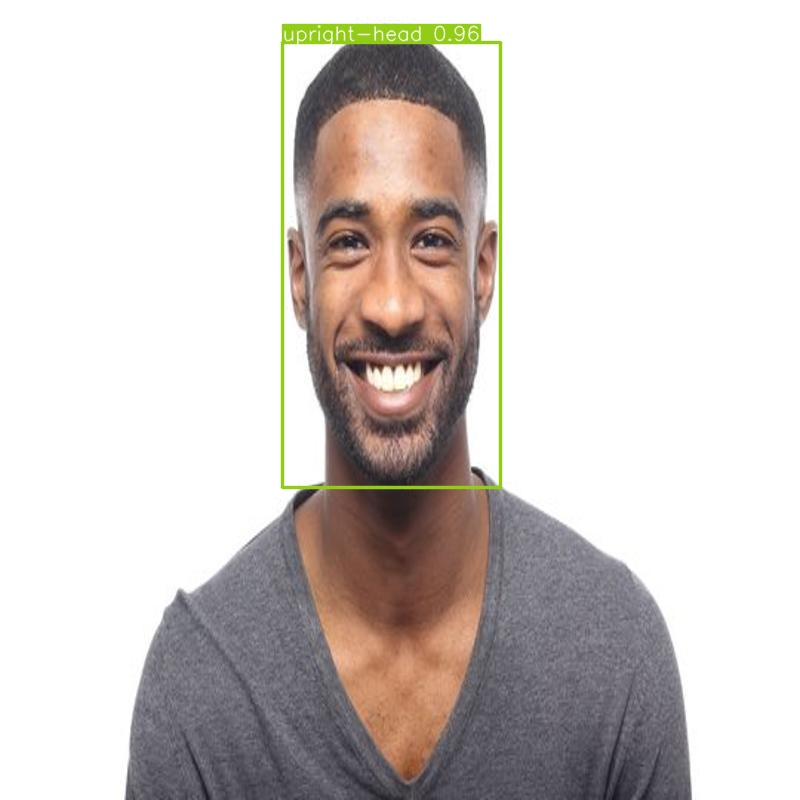

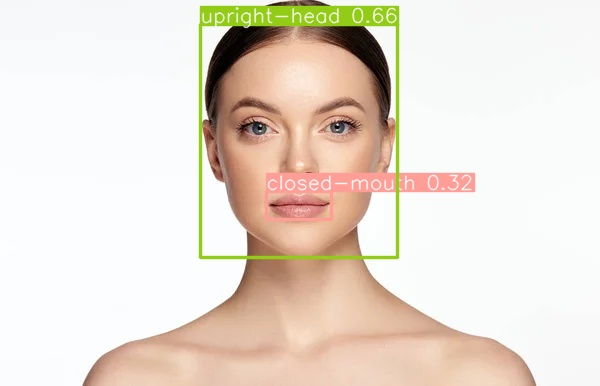

In [18]:
#Outputting 2 of the images results
import glob
import random
from IPython.display import Image, display

imagePaths = glob.glob(f'{HOME}/runs/detect/predict30/*.jpg')
random.shuffle(imagePaths)
for imagePath in imagePaths[:2]:
      display(Image(filename=imagePath, width=600))
      print("\n")

### Running inference on videos
Running the model for predicting on videos

In [ ]:

!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.2 source={HOME}/videosInferenceTest

Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5600X 6-Core Processor)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

video 1/6 (1/298) c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\videosInferenceTest\Person driving 1.mp4: 480x800 1 closed-mouth, 1 upright-head, 348.7ms
video 1/6 (2/298) c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\videosInferenceTest\Person driving 1.mp4: 480x800 1 closed-mouth, 1 upright-head, 335.6ms
video 1/6 (3/298) c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\videosInferenceTest\Person driving 1.mp4: 480x800 1 closed-mouth, 1 upright-head, 231.3ms
video 1/6 (4/298) c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\videosInferenceTest\Person driving 1.mp4: 480x800 1 closed-mouth, 1 upright-head, 245.2ms
video 1/6 (5/298) c:\Users\neil9\Desktop\PrototypeTutorial1\Tutorial1\videosInferenceTest\Person driving 1.mp4: 480x800 1 closed-mouth, 1 upright-head, 252.7ms
video 1/6 (6/298) c:\

### Running inference on a live video stream

In [20]:
from ultralytics import YOLO

#Loading my trained custom model
modelPath = f'{HOME}/runs/detect/train5_10/weights/best.pt'
model = YOLO(modelPath)

#Running inference on the camera stream with a confidence level of 0.1
results = model(source=0, show=True, conf=0.1, save=True)


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 608x800 1 closed-mouth, 1 tilted-head, 179.8ms
0: 608x800 1 closed-mouth, 1 tilted-head, 176.9ms
0: 608x800 1 closed-mouth, 1 tilted-head, 178.0ms
0: 608x800 1 closed-mouth, 1 upright-head, 200.9ms
0: 608x800 1 closed-mouth, 1 upright-head, 186.5ms
0: 608x800 1 closed-mouth, 1 upright-head, 176.0ms
0: 608x800 1 closed-mouth, 1 upright-head, 183.0ms
0: 608x800 1 closed-mouth, 1 upright-head

KeyboardInterrupt: 

## Driver Drowsiness Detection System final code
Final Prototype Code

In [7]:

import torch
import numpy as np
import cv2
from time import time
from ultralytics import YOLO
from supervision.draw.color import ColorPalette
from supervision import Detections, BoxAnnotator
import supervision as sv
import os
import dlib
from imutils import face_utils #This will be used for conversion for the face to be used for getting the eye states
import winsound

#Run pip install supervision: pip install --user supervision


#Creating a HOME variable for easy path management
HOME = os.getcwd()
print(HOME)

#Getting the face landmarks dataset
predictorDataset = f'{HOME}/data/shape_predictor_68_face_landmarks.dat'
print(predictorDataset)

#Initializing the capture of the camera
capture = cv2.VideoCapture(0)

#Initializing the face detector
faceDetector = dlib.get_frontal_face_detector()

#Initializing the landmark detector using the dataset
predictor = dlib.shape_predictor(predictorDataset)


#Function to calculate the distance between 2 points for the eye states
def calcDistance(point1, point2):
	distance = np.linalg.norm(point1 - point2)
	return distance

#Function to calculate the eye status based on the landmarks passed, and calculating according to certain distances between landmarks in a real time manner
def eyeStatus(a,b,c,d,e,f):

	#Creating a variable to store the current height of the eye
	height = calcDistance(b,d) + calcDistance(c,e)

	#Creating a variable to store the current width of the eye
	width = calcDistance(a,f)

	#Creating a variable to store the ratio of the height with the double width
	ratio = height / (2.0*width)

	#If the ratio is larger than 0.25, it means that the eye is fully open
	if(ratio>0.25):
		return 2, ratio
	
	#If the ratio is between 0.21 and 0.25, it means that the eye is half closed
	elif(ratio>0.21 and ratio<=0.25):
		return 1, ratio
	
	#If the ratio is smaller than 0.21, it means that the eye is closed
	else:
		return 0, ratio


class ObjectDetection:

    #Initialising for the object detection
    def __init__(self, capture_index):
        self.capture_index = capture_index
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print ("Using ", self.device)
        self.model = self.loadModel()
        self.CLASS_NAMES_DICT = self.model.model.names
        self.box_annotator = sv.BoxAnnotator(sv.ColorPalette.default(), thickness=1, text_thickness=1, text_scale=0.5)

    #Loading the custom trained model
    def loadModel(self):
        modelPath = f'{HOME}/runs/detect/train5_10/weights/best.pt'
        model = YOLO(modelPath)

        return model
    
    #Taking each frame and passing it into a model, so that the results are obtained
    def predict(self, frame):
        results = self.model(frame)

        return results
    
    #Extracting all of the information from the custom model
    def boundingBoxPlots(self, results, frame):

        #Extracting the detections, by getting the class IDs
        for result in results[0]:
            class_id = result.boxes.cls.cpu().numpy().astype(int)

        #Obtaining the detections
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence = results[0].boxes.conf.cpu().numpy(),
            class_id = results[0].boxes.cls.cpu().numpy().astype(int)
        )

        #Going through all the custom labels by a for loop which runs through all the detections, and getting the class IDs and confidence scores
        self.labels = [f"{self.CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
                       for xyxy, mask, confidence, class_id, tracker_id, data
                       in detections]
        
        #Annotating the frame by making use of the BoxAnnotator instance created previously
        frame = self.box_annotator.annotate(scene=frame, detections=detections, labels=self.labels)

        #Returning the frame
        return frame, detections
    

    #This function will run as long as the camera is open
    def __call__(self):

        #Initializing variables which represent the status for the eye in real time
        sleep = 0
        drowsy = 0
        active = 0
        status=""
        eyeStateForDrivDrow = ""
        leftEyeRatio=""
        rightEyeRatio=""
        color=(0,0,0)

        #Initializing the duration beep alert when the individual is sleeping or drowsy (in milliseconds)
        alertDuration = 100

        #Creating a function to output the text for alerting the individual when sleeping
        def outputSleepyAlertText():
            cv2.rectangle(drivDrowFrame, (400, 30), (620, 110), (0,0,0), -1)
            cv2.putText(drivDrowFrame, "SLEEPING", (440, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)


        #Opening the video capture
        cap = cv2.VideoCapture(self.capture_index)
        assert cap.isOpened()

        #Setting the frame width and height
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1000)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1000)

        #While the capture is opened
        while True:

            ret, faceExtractionsframe = cap.read()
            
            #Creating a variable representing if a face is present or not
            detectedFace = 0

            #Converting the frame to grayscale format for the program since the face detector operates better with grayscale than with RGB
            grayscaleFormat = cv2.cvtColor(faceExtractionsframe, cv2.COLOR_BGR2GRAY)
            faces = faceDetector(grayscaleFormat)

            #Creating a variable for the landmark output frame
            drivDrowFrame = None

            #This is the window which will represent the Driver Drowsiness Detection system
            drivDrowFrame = faceExtractionsframe.copy()

            #If no faces are detected, it is outputted
            if not faces:
                print("No face detected!")
            else:
                detectedFace = 1

                #For the face detected in the faces array, do the following
                for face in faces:

                    #Creating an array for the face landmarks
                    landmarks = predictor(grayscaleFormat, face)
                    landmarks = face_utils.shape_to_np(landmarks)

                    #For the eye states:

                    #Checking the eye state by using those landmarks in the landmarks array surrounding each eye 
                    leftEyeStatus = eyeStatus(landmarks[42], landmarks[43], landmarks[44], landmarks[47], landmarks[46], landmarks[45])
                    rightEyeStatus = eyeStatus(landmarks[36], landmarks[37], landmarks[38], landmarks[41], landmarks[40], landmarks[39])

                    #Creating variables for the EAR (eye aspect ratio) values
                    leftEyeRatio = leftEyeStatus[1];
                    rightEyeRatio = rightEyeStatus[1];
                    
                    #If any eye status is 0, it means that one or both the eyes are closed
                    if(leftEyeStatus[0]==0 or rightEyeStatus[0]==0):
                        sleep+=1 #incrementing by 1 each time since the user has one or both eyes closed
                        drowsy=0 #this is set to 0 since the user has one or both eyes closed, and not half closed
                        active=0 #this is set to 0 since the user has one or both eyes closed, and not open

                        #If one or both eyes are closed for a reasonable amount of time, the 'sleep' variable will have a high value since it has been incremented over and over again
                        #Therefore, the user is sleeping
                        if(sleep>3):
                            status = "Closed eyes"
                            color = (0,0,255)
                            eyeStateForDrivDrow = "closed"

                    #If any eye status is 1, it means that one or both the eyes are half closed
                    elif(leftEyeStatus[0]==1 or rightEyeStatus[0]==1):
                        sleep=0 #this is set to 0 since the user has one or both eyes half closed, and not closed
                        active=0 #this is set to 0 since the user has one or both eyes half closed, and not open
                        drowsy+=1 #incrementing by 1 each time since the user has one or both eyes half closed

                        #If one or both eyes are half closed for a reasonable amount of time, the 'drowsy' variable will have a high value since it has been incremented over and over again
                        #Therefore, the user is drowsy
                        if(drowsy>3):
                            status = "Half-closed eyes"
                            color = (0,255,255)
                            eyeStateForDrivDrow = "half-closed"
                    
                    #If the eye status is 2, it means that one or both the eyes are fully open
                    elif(leftEyeStatus[0]==2 or rightEyeStatus[0]==2):
                        drowsy=0 #this is set to 0 since the user has one or both eyes fully open, and not halfclosed
                        sleep=0 #this is set to 0 since the user has one or both eyes fully open, and not closed
                        active+=1 #incrementing by 1 each time since the user has one or both eyes fully open

                        #If one or both eyes are fully open for a reasonable amount of time, the 'active' variable will have a high value since it has been incremented over and over again
                        #Therefore, the user is in an active state
                        if(active>3):
                            status = "Open eyes"
                            color = (0,255,0)
                            eyeStateForDrivDrow = "open"

                    #If the eye status is not 0, 1 or 2, something went wrong
                    else:
                        status = "Error"
                        color = (0,102,204)
                        eyeStateForDrivDrow = "none"
                        
                    #Outputting the status result in the frame window according to the calculations made for the eye states
                    cv2.putText(faceExtractionsframe, status, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

                    #Outputting the EAR value of the left eye
                    cv2.putText(faceExtractionsframe, "Left eye EAR: " + str(round(leftEyeRatio, 3)), (650, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 1)

                    #Outputting the EAR value of the right eye
                    cv2.putText(faceExtractionsframe, "Right eye EAR: " + str(round(rightEyeRatio, 3)), (650, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 1)


            #Predicting each frame and getting the results
            results = self.predict(faceExtractionsframe)

            #Visualizing the frame and getting the classes which were predicted
            faceExtractionsframe, predictedClasses = self.boundingBoxPlots(results, faceExtractionsframe)

            #Class IDs and their actual class names:
            #0 - closed-eye
            #1 - closed-mouth
            #2 - half-closed eye
            #3 - open-eye
            #4 - open-mouth
            #5 - tilted-head
            #6 - upright-head

            #Initializing variables which represent the status for the eyes, mouth and head position in real time
            count = 0
            predictedOpenMouth = 0
            predictedClosedMouth = 0
            predictedUprightHead = 0
            predictedTiltedHead = 0
            predictedOpenEye = 0
            predictedHalfClosedEye = 0
            predictedClosedEye = 0

            #For each class predicted, the matching variable is set to 1 so thath later, the driver's state can be determined 
            for predictedClass in predictedClasses:
                if (predictedClasses.class_id[count] == 0):
                    predictedClosedEye = 1
                if (predictedClasses.class_id[count] == 1):
                    predictedClosedMouth = 1
                if (predictedClasses.class_id[count] == 2):
                    predictedHalfClosedEye = 1
                if (predictedClasses.class_id[count] == 3):
                    predictedOpenEye = 1
                if (predictedClasses.class_id[count] == 4):
                    predictedOpenMouth = 1
                if (predictedClasses.class_id[count] == 5):
                    predictedTiltedHead = 1
                if (predictedClasses.class_id[count] == 6):
                    predictedUprightHead = 1
                count = count+1

            
            #Outputting the detected classes in the face features & states window
            cv2.putText(faceExtractionsframe, "Classes detected: " + str(predictedClasses.class_id), (650, 130), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 1)


            #Creating a variable to represent what will be outputted in the driver drowsiness detection window
            textToShow = ""

            #In the following lines of code, it will be decided on what to output in the driver drowsiness detection window, based on all the detections (mouth, eyes, head)
            #The alert frequency will change according to the state:
            #   If the individual is drowsy, the beep frequency will be low, so that it is not extremely alerting
            #   If the individual is sleeping, the beep frequency will be higher, so that it is extremely alerting
            
            #Determining the state of the driver based on the detections:

            #If no face is detected, it is outputted
            if (detectedFace == 0):
                textToShow = "No face detected"
            #If the head position is upright, the individual is active
            if (predictedUprightHead == 1):
                textToShow = "Active"
            #If the eyes are open, the mouth is closed and the head position is straight, the individual is active
            if ((eyeStateForDrivDrow == "open" or predictedOpenEye == 1)  and predictedClosedMouth == 1 and predictedUprightHead == 1):
                textToShow = "Active"
            #If the eyes are closed and the head position is tilted, the individual is asleep
            if ((eyeStateForDrivDrow == "closed" or predictedClosedEye == 1) and predictedTiltedHead == 1):
                textToShow = "Asleep"
                winsound.Beep(2000, alertDuration)
                outputSleepyAlertText()
            #If the eyes are closed for a reasonable amunt of time, the individual is asleep
            if(eyeStateForDrivDrow == "closed" or predictedClosedEye == 1):
                textToShow = "Asleep"
                winsound.Beep(2000, alertDuration)
                outputSleepyAlertText()


            #Drawing a black rectangle to show the current driver state on top of it
            cv2.rectangle(drivDrowFrame, (0, 0), (240, 75), (0,0,0), -1)

            #Drawing another black rectangle to show extra information of the driver state (drowsy)
            cv2.rectangle(drivDrowFrame, (0,75), (320, 145), (0,0,0), -1)
            

            #In the following lines of code, early signs of drowsiness are outputted in the driver drowsiness detection window, where applicable

            #If the individual opens his mouth for a reasonable amount of time, it means that the individual is yawning, therefore starting to feel drowsy
            if (predictedOpenMouth == 1):
                textToShow = "Drowsy"
                cv2.putText(drivDrowFrame, "Starting to feel drowsy - yawning", (0, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
                winsound.Beep(450, alertDuration)
            #If the individual's eyes are half-closed for a reasonable amount of time, it means that the individual is starting to feel drowsy
            if (eyeStateForDrivDrow == "half-closed" or predictedHalfClosedEye == 1):
                textToShow = "Drowsy"
                cv2.putText(drivDrowFrame, "Starting to feel drowsy - droopy eyes", (0, 115), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
                winsound.Beep(450, alertDuration)
            #If the individual's head position is tilted for a reasonable amount of time, it means that the individual is starting to feel drowsy
            if (predictedTiltedHead == 1):
                textToShow = "Drowsy"
                cv2.putText(drivDrowFrame, "Starting to feel drowsy - tilted head", (0, 135), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
                winsound.Beep(450, alertDuration)

            #Adding the text to be outputted in the Driver Drowsiness Detection frame
            cv2.putText(drivDrowFrame, textToShow, (20,35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)

            #Displaying the driver drowsiness detection window
            cv2.imshow('Driver Drowsiness Detection', drivDrowFrame)

            #Displaying the face features and states window
            cv2.imshow('Face features & states', faceExtractionsframe)

            #The program exits when 'q' is pressed
            if cv2.waitKey(1) == ord('q'):
                break
        
        cap.release()
        cv2.destroyAllWindows()

#Calling instance of ObjectDetection class
detector = ObjectDetection(capture_index=0)

#Calling the detector method which is '__call__'
detector()



c:\Users\neil9\Desktop\PROTOTYPETOUPLOAD\DriverDrowsinessDetectionSystem\Prototype
c:\Users\neil9\Desktop\PROTOTYPETOUPLOAD\DriverDrowsinessDetectionSystem\Prototype/data/shape_predictor_68_face_landmarks.dat
Using  cpu


SupervisionWarnings: default is deprecated: `ColorPalette.default()` is deprecated and will be removed in `supervision-0.22.0`. Use `Color.DEFAULT` instead.


No face detected!



0: 480x800 (no detections), 159.0ms
Speed: 4.0ms preprocess, 159.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 146.1ms
Speed: 3.0ms preprocess, 146.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 136.2ms
Speed: 3.0ms preprocess, 136.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 137.0ms
Speed: 3.0ms preprocess, 137.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 131.0ms
Speed: 4.0ms preprocess, 131.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 139.2ms
Speed: 2.0ms preprocess, 139.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 131.0ms
Speed: 3.0ms preprocess, 131.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 130.0ms
Speed: 3.0ms preprocess, 130.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 132.5ms
Speed: 3.0ms preprocess, 132.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 131.0ms
Speed: 2.0ms preprocess, 131.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!


0: 480x800 (no detections), 135.0ms
Speed: 3.0ms preprocess, 135.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 closed-mouth, 133.0ms
Speed: 3.0ms preprocess, 133.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 closed-mouth, 133.0ms
Speed: 3.0ms preprocess, 133.0ms inf

No face detected!
No face detected!


0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 133.0ms
Speed: 4.0ms preprocess, 133.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 131.0ms
Speed: 3.0ms preprocess, 131.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 133.0ms
Speed: 2.0ms preprocess, 133.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 134.0ms
Speed: 4.0ms preprocess, 134.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 132.0ms
Speed: 2.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 132.0ms
Speed: 2.0ms preprocess, 132.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 134.0ms
Speed: 2.0ms preprocess, 134.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 131.0ms
Speed: 3.0ms preprocess, 131.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 139.0ms
Speed: 2.0ms preprocess, 139.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 closed-mouth, 131.0ms
Speed: 2.0ms preprocess, 131.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 131.0ms
Speed: 4.0ms preprocess, 131.0ms in

No face detected!


0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 closed-mouth, 131.0ms
Speed: 3.0ms preprocess, 131.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 closed-mouth, 1 upright-head, 133.0ms
Speed: 2.0ms preprocess, 133.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 closed-mouth, 131.0ms
Speed: 3.0ms preproce

No face detected!
No face detected!


0: 480x800 (no detections), 134.0ms
Speed: 3.0ms preprocess, 134.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 130.0ms
Speed: 3.0ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 134.0ms
Speed: 3.0ms preprocess, 134.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 128.0ms
Speed: 3.0ms preprocess, 128.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 136.0ms
Speed: 3.0ms preprocess, 136.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 130.0ms
Speed: 3.0ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 136.0ms
Speed: 2.0ms preprocess, 136.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 135.0ms
Speed: 4.0ms preprocess, 135.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 134.0ms
Speed: 3.0ms preprocess, 134.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 132.0ms
Speed: 3.0ms preprocess, 132.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 133.0ms
Speed: 2.0ms preprocess, 133.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 133.0ms
Speed: 3.0ms preprocess, 133.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 136.0ms
Speed: 3.0ms preprocess, 136.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 129.0ms
Speed: 3.0ms preprocess, 129.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 132.0ms
Speed: 2.0ms preprocess, 132.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 132.0ms
Speed: 2.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 136.0ms
Speed: 2.0ms preprocess, 136.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 129.0ms
Speed: 3.0ms preprocess, 129.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 133.0ms
Speed: 3.0ms preprocess, 133.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 130.0ms
Speed: 3.0ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 133.0ms
Speed: 3.0ms preprocess, 133.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 131.0ms
Speed: 2.0ms preprocess, 131.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 1 upright-head, 135.0ms
Speed: 2.0ms preprocess, 135.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 132.0ms
Speed: 4.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 (no detections), 158.4ms
Speed: 3.0ms preprocess, 158.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 130.0ms
Speed: 3.0ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!
No face detected!


0: 480x800 1 tilted-head, 131.0ms
Speed: 3.0ms preprocess, 131.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 128.0ms
Speed: 2.0ms preprocess, 128.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!


0: 480x800 (no detections), 132.0ms
Speed: 2.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 tilted-head, 129.0ms
Speed: 3.1ms preprocess, 129.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)


No face detected!


SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 130.0ms
Speed: 3.0ms preprocess, 130.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead



No face detected!


0: 480x800 (no detections), 136.0ms
Speed: 2.0ms preprocess, 136.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 closed-mouth, 130.0ms
Speed: 2.0ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 (no detections), 130.0ms
Speed: 3.0ms preprocess, 130.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 800)
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead

0: 480x800 1 closed-mouth, 1 upright-head, 129.0ms
Speed: 2.0ms preproc